<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="float:right; max-width: 250px; display: inline"  alt="Wikistat"/></a>

</center>

# [Scénarios d'Exploration Statistique](https://github.com/wikistat/Exploration)

# Analyse de signaux  issus d'un *smartphone* en <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a> avec <a href="http://scikit-learn.org/stable/#"><img src="http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" style="max-width: 100px; display: inline" alt="Scikit-Learn"/></a>
## Données transformées (métier): exploration et première modélisation par [ACP](http://wikistat.fr/pdf/st-m-explo-acp.pdf), [AFD](http://wikistat.fr/pdf/st-m-explo-afd.pdf), [régression logistique](http://wikistat.fr/pdf/st-m-app-rlogit.pdf).

### Résumé
Ce cas d'usage de [reconnaissance d'activités humaines](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) à partir des enregistrements d'un smartphone (gyroscope, accéléromètre) est traité pour illustrer les principales étapes d'exploration et apprentissage communes en *science des données* et applicables à des signaux. Les données analysées sont obtenues après transformation "métier" des données brutes afin de caractériser au mieux les comportements. Exploration multidimensionnelle par méthodes factorielles, classification non supervisée, avant d'introduire le problème de classification supervisée pour prévoir l'activité. La régression logistique est testée avec succès.

## 1 Introduction
### 1.1 Contexte
Les données sont issues de la communauté qui vise la reconnaissance d'activités humaines (*Human activity recognition, HAR*) à partir d’enregistrements, par exemple du gyroscope et de l'accéléromètre d'un smartphone. Voir à ce propos l'[article](https://www.elen.ucl.ac.be/Proceedings/esann/esannpdf/es2013-11.pdf) relatant un colloque de 2013.  

Les données publiques disponibles et largement étudiées ont été acquises, décrites et analysées par [Anguita et al. (2013)](). Elles sont accessibles sur le [dépôt](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) de l'University California Irvine (UCI) consacré à l'apprentissage machine ainsi que sur le site *Kaggle*.

L'archive contient les données brutes: accélérations échantillonnnées à 64 htz pendant 2s. Les accélérations en x, y, et z, chacune de 128 colonnes, celles en y soustrayant la gravité naturelle ainsi que les accélérations angulaires (gyroscope) en x, y, et z soit en tout 9 fichiers.

Il sagit donc d'un ensemble de signaux comme il est extrêmement fréquent d'en rencontrer en lien avec des objets connectés, ici un smartphone, ou dans tout environnement industriel ou scientifique. Les approches développées dans les calepins traitant de ces données sont tout à fait génériques.

L'**archive contient également** deux fichiers `train` et `test` de 561 *features* ou variables "métier" calculées dans les domaines temporels et fréquentiels à partir des signaux bruts.

Les données, chaque enregistrement échantilloné 128 fois, sont labellisées avec **6 activités** : debout, assis, couché, marche, monter ou descendre un escalier. Il s'agit donc d'un problème de classification supervisée (6 classes) avec 10 299 échantillons pour l'apprentissage, 2 947 pour le test, décrites par 561 variables métiers ou 768 mesures issues de l'échantillonnage des signaux.

Voici une liste indicative des variables calculées sur chacune des variables initiales et couples de variables:

Name|Signification
-|-
mean | Mean value
std | Standard deviation
mad | Median absolute value
max | Largest values in array
min | Smallest value in array
sma | Signal magnitude area
energy | Average sum of the squares
iqr | Interquartile range
entropy | Signal Entropy
arCoeff | Autorregresion coefficients
correlation | Correlation coefficient
maxFreqInd | Largest frequency component
meanFreq | Frequency signal weighted average
skewness | Frequency signal Skewness
kurtosis | Frequency signal Kurtosis
energyBand | Energy of a frequency interval
angle | Angle between two vectors

### 1.2 Objectifs
Ce calepin s'intéresse aux seules variables construites à partir des connaissances *a priori* du comportement des capteurs en fonction des types d'activité humaine. IL propose une exploration et une modélisation, des 561 variables métier. Il s'agit de répondre à la question : est-il possible d'identifier l'activité du porteur du smartphone à partir d'un enregistrement? 


Un [autre calepin]()  s'intéresse aux données brutes afin d'économiser le travail préliminaire de définition des variables métier en utilisant, par exemple, des décompositions systématiques sur une base d'ondelettes ou, mieux, un algorithme d'apprentissage profond sur les seules données brutes. L'enjeu est d'obtenir une discrimination sur les données brutes donc moins énergivores qu'un calcul systématique des caractéristiques métier.

Une *troisième étape* viserait à traiter les données à flux continu pour une application réelle de la reconnaissance d'activité afin, par exemple, de sécuriser des personnes dépendantes ou d'évaluer l'activité physique d'un assuré...

Une optimisation poussée de la modélisation des méthodes d'apprentissage sur les données métiers comme le traitement direct des données bruts sont abordés dans d'autres calepins. L'objectif est d'abord une sensibilisation au traitement de données complexes temporelles.

In [11]:
# Importation des principals librairies et 
# Affichage des graphiques dans le notebook
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

### 1.3 Lecture des données métier

Les données peuvent être préalablement téléchargées ou directement lues. Ce sont celles originales du dépôt de l'[UCI](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones). 

In [12]:
# Lecture des données d'apprentissage
# Attention, il peut y avoir plusieurs espaces comme séparateur dans le fichier
Xtrain = pd.read_table("X_train.txt", sep = '\s+', header = None)
Xtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [13]:
# Variable cible
ytrain = pd.read_table("y_train.txt", sep = '\s+', header = None, names = list('y'))
# Le type dataFrame est inutile et même gênant pour les la suite
ytrain = ytrain["y"]

In [14]:
# Lecture des données de test
Xtest = pd.read_table("X_test.txt", sep = '\s+', header = None)
Xtest.shape

(2947, 561)

In [15]:
ytest = pd.read_table("y_test.txt", sep = '\s+', header = None, names = list('y'))
ytest = ytest["y"]
# Significaiton des codes de y
label_dic = {1 : "Marcher", 2 : "Monter escalier", 3 : "Descendre escalier",
   4 : "Assis", 5 : "Debout", 6 : "Couche"}
labels = label_dic.values()

## 2 Exploration par [Analyse en composantes principales](http://wikistat.fr/pdf/st-m-explo-acp.pdf)
### 2.1 Principe
Il est important de se faire une idée précise de la structure des données.  Une analyse en composantes principales est adaptée à cet objectif. 

   - Elle recherche les axes de plus grande dispersion du nuages des individus dans $R^p$ avec $p=561$. Ces axes sont définis par les vecteurs propres de la matrice des covariances ou des corrélations si les variables sont réduites (divisées par l'écart-type).
   - Les représentations graphiques des individus sont obtenues par projection sur les sous-espaces engendrés par les premiers vecteurs propres. Elles préservent au mieux les distances entre ceux-ci.
   - Les coordonnées sont stockées dans la matrice des *composantes principales* qui sont aussi les combinaisons linéaires de plus grande variance des variables. Ce sont des variables décorrélées, orthogonales deux à deux.
   - Les representations graphiques des variables initiales conservent au mieux les angles entre les vecteurs variables dans l'espace $R^n$ de façon à interpréter leurs corrélations qui, géométriquement, sont les cosinus de ces angles. 

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

La fonction définie ci-après affiche un nuage de points dans un plan factoriel.

In [20]:
def plot_pca(X_R, fig, ax, nbc, nbc2):
    for i in range(6):
        xs = X_R[ytrain == i + 1, nbc - 1]
        ys = X_R[ytrain == i + 1, nbc2 - 1]
        label = label_dic[i + 1]
        color = cmaps(i)
        ax.scatter(xs, ys, color = color, alpha = .8, s = 1, label = label)
        ax.set_xlabel("PC%d : %.2f %%" %(nbc, pca.explained_variance_ratio_[nbc - 1] * 100), fontsize = 10)
        ax.set_ylabel("PC%d : %.2f %%" %(nbc2, pca.explained_variance_ratio_[nbc2 - 1] * 100), fontsize = 10)

Calcul de la matrice des composantes principales. C'est aussi un changement (transformation) de base; de la base canonique dans la base des vecteurs propres. 

In [21]:
pca = PCA()
X_r = pca.fit_transform(Xtrain)

### 2.2 Valeurs propres ou variances des composantes principales
Représentation de la décroissance des valeurs propres, les variances des variables ou composantes principales.

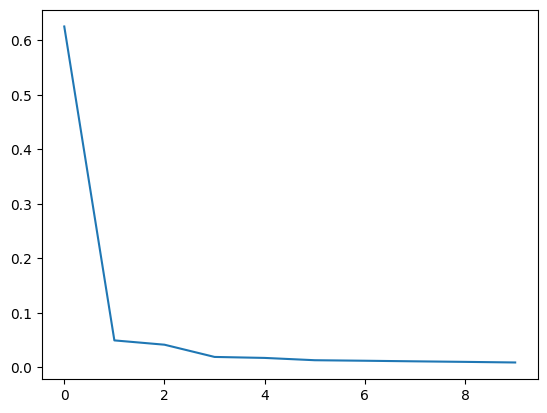

In [22]:
plt.plot(pca.explained_variance_ratio_[0:10])
plt.show()

Un graphique plus explicite décrit les distribution de ces composantes par des diagrames boîtes; seules les premières sont affichées. 

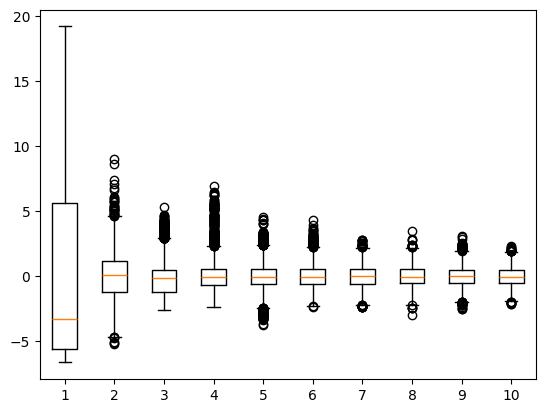

In [23]:
plt.boxplot(X_r[:,0:10])
plt.show()

Commenter la décroissance des variances, le choix éventuel d'une dimension ou nombre de composantes à retenir sur les 561.

On observe une grande variance pour la première valeur propre.

### 2.3 Représentation des individus ou "activités"
Projection dans les principaux plans factoriels.

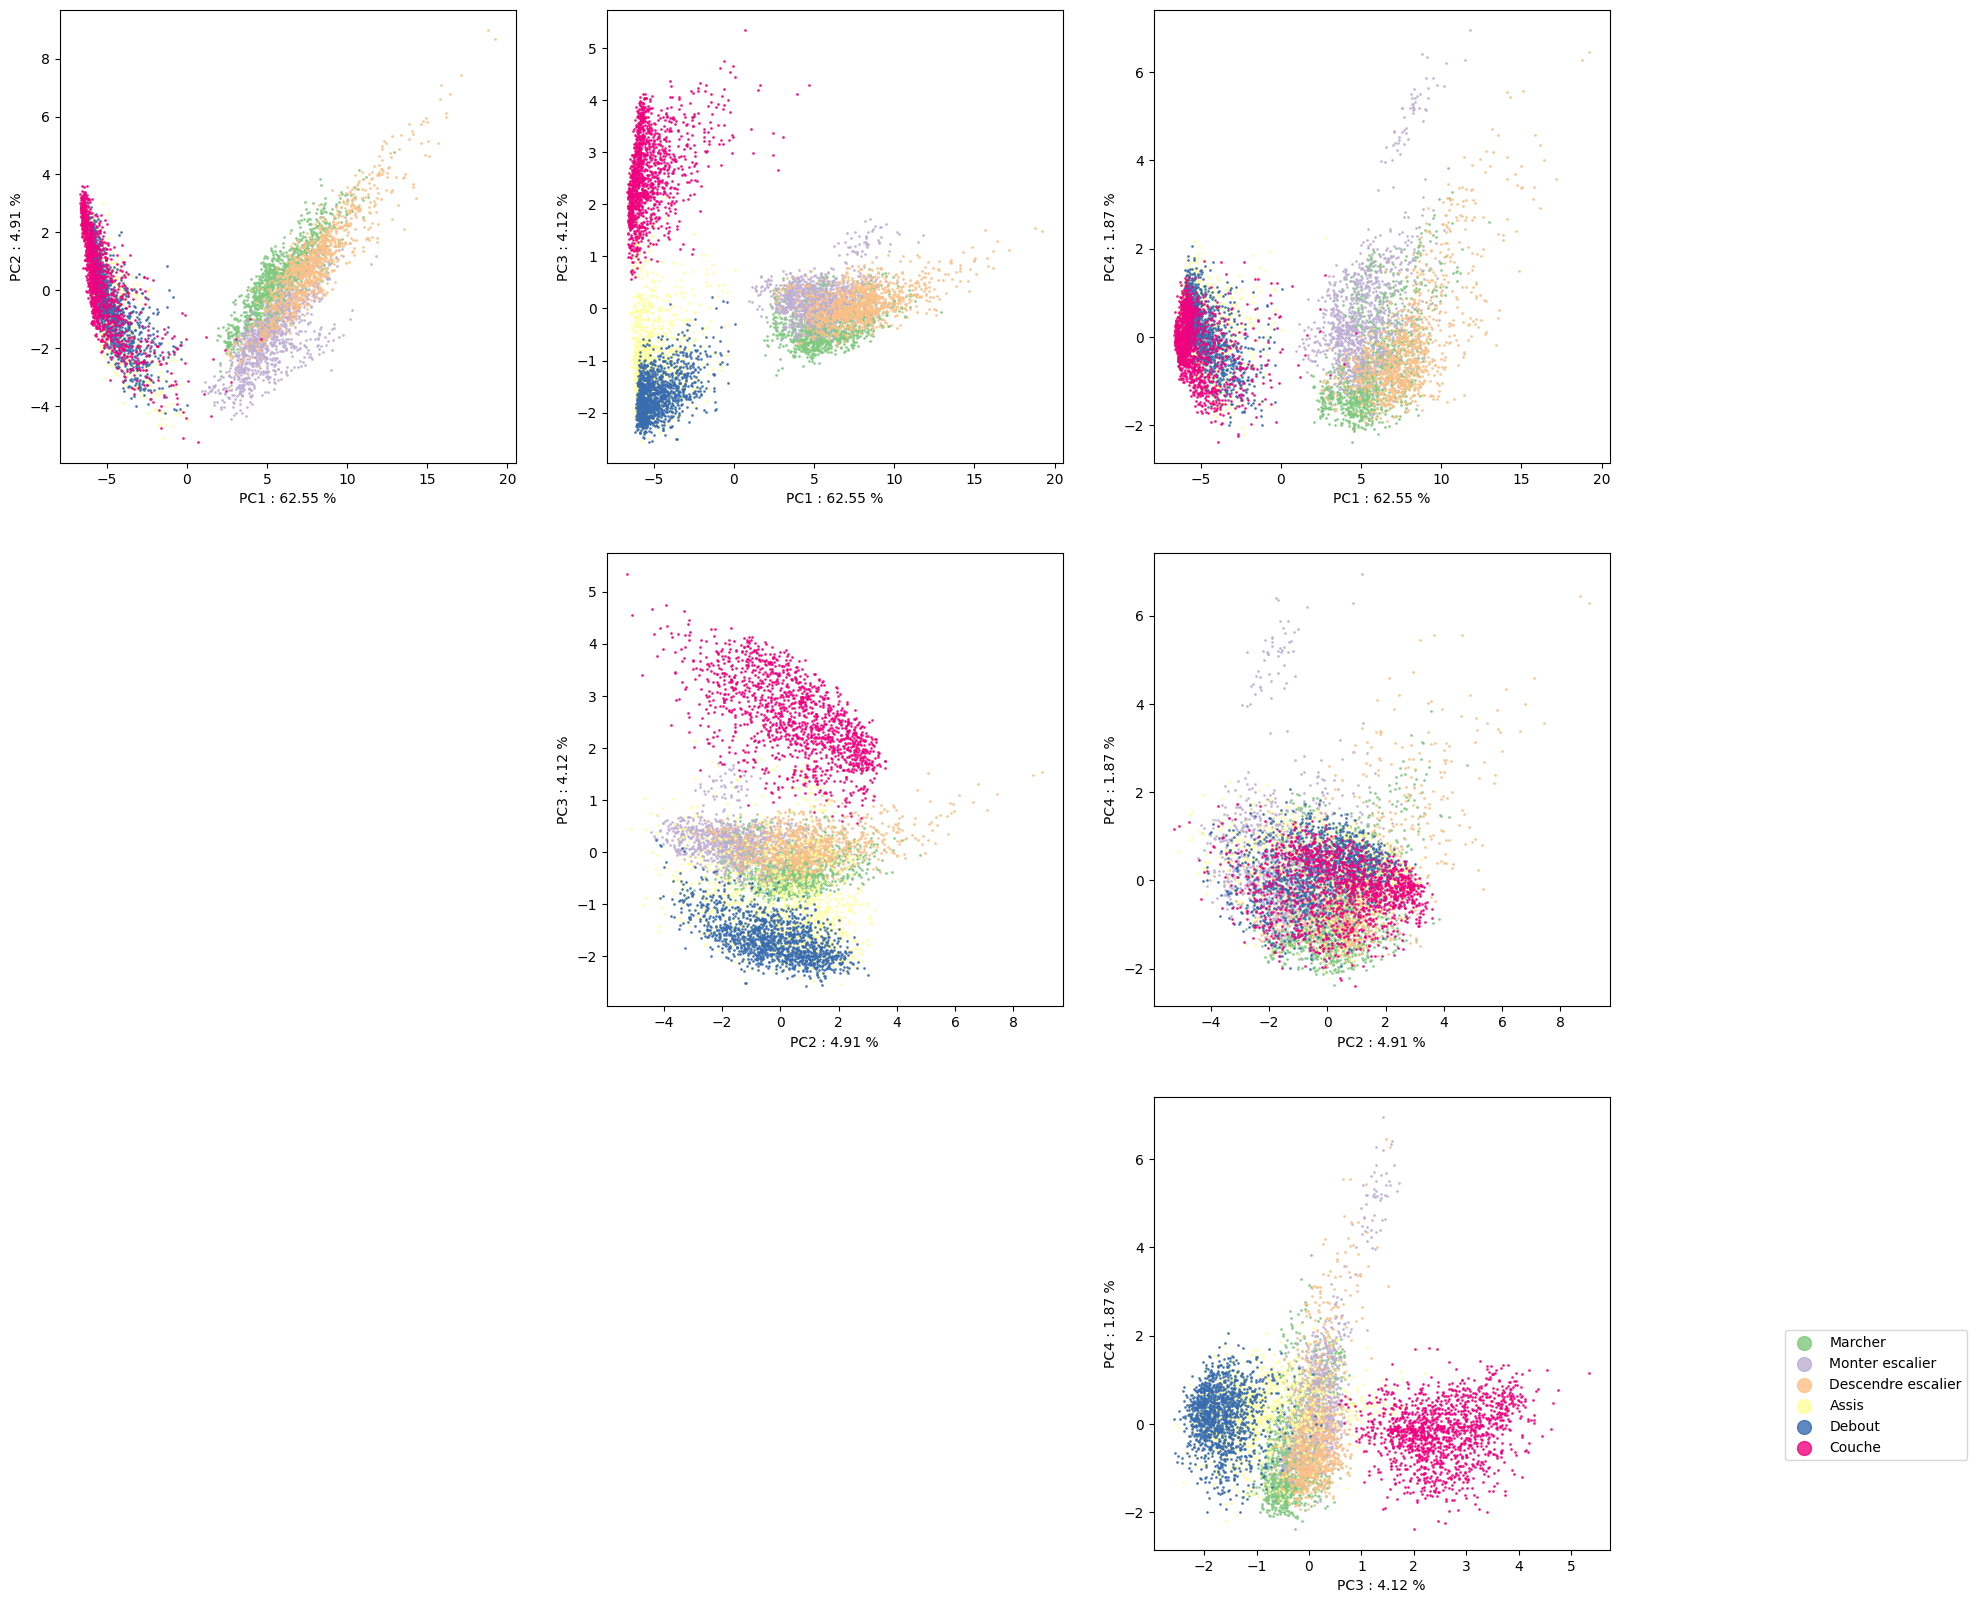

In [24]:
cmaps = plt.get_cmap("Accent")
fig = plt.figure(figsize = (20, 20))
count = 0
for nbc, nbc2,count in [(1, 2, 1), (1, 3, 2), (1, 4, 3), (2, 3, 5), (2, 4, 6), (3, 4, 9)] :
    ax = fig.add_subplot(3, 3, count)
    plot_pca(X_r, fig, ax, nbc, nbc2)
plt.legend(loc = 'upper right', bbox_to_anchor = (1.8, 0.5), markerscale = 10)
plt.show()

**Q** Commenter la séparation des deux types de situation par le premier axe.

    La séparation correspond à la différence : en mouvement / statique

**Q** Que dire sur la forme des nuages?

    La forme des nuages est ovale et non sphérique : la métrique n'est donc pas optimale

**Q** Que dire sur la plus ou moins bonne séparation des classes?

    Les classes sont séparées uniquement en deux parties : ce n'est pas suffisant pour les séparer


### 2.4 Représentation des variables
Lecture des libellés des variables et constitution d'une liste. Souci de la grande dimension (561), les représentations ne sont guère exploitables. 

In [25]:
with open('features.txt', 'r') as content_file:
    featuresNames = content_file.read()
columnsNames = list(map(lambda x : x.split(" ")[1], featuresNames.split("\n")[:-1]))

Graphe illisible en mettant les libellés en clair. Seule une * est représentée.

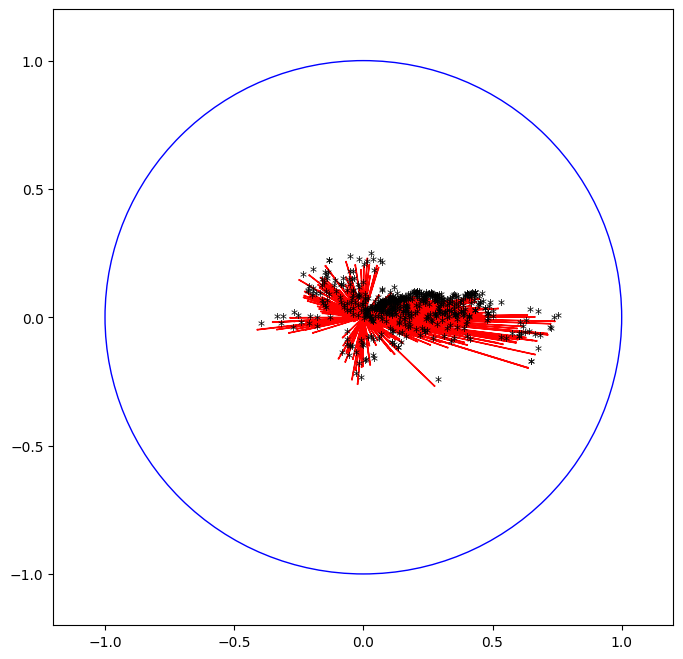

In [26]:
# coordonnées des variables
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1, 1, 1)
for i, j in zip(coord1, coord2, ):
    plt.text(i, j, "*")
    plt.arrow(0, 0, i, j, color = 'r')
plt.axis((-1.2, 1.2, -1.2, 1.2))
# cercle
c = plt.Circle((0,0), radius = 1, color = 'b', fill = False)
ax.add_patch(c)
plt.show()

Identification des variables participant le plus au premier axe. Ce n'est pas plus clair ! Seule la réprésentation des individus apporte finalement des éléments de compréhension.

In [27]:
np.array(columnsNames)[abs(coord1) > .6]

array(['tBodyAccJerk-entropy()-X', 'tBodyAccJerk-entropy()-Y',
       'tBodyAccMag-entropy()', 'tGravityAccMag-entropy()',
       'tBodyAccJerkMag-entropy()', 'tBodyGyroJerkMag-entropy()',
       'fBodyAcc-entropy()-X', 'fBodyAcc-entropy()-Y',
       'fBodyAcc-entropy()-Z', 'fBodyAccJerk-entropy()-X',
       'fBodyAccJerk-entropy()-Y', 'fBodyAccJerk-entropy()-Z',
       'fBodyAccMag-entropy()', 'fBodyBodyAccJerkMag-entropy()',
       'fBodyBodyGyroJerkMag-entropy()'], dtype='<U36')

## 3 Exploration par [Analyse Factorielle Discriminante (AFD)](http://wikistat.fr/pdf/st-m-explo-afd.pdf)
### 3.1 Principe
L'ACP ne prend pas en compte la présence de la variable qualitative à modéliser, contrairement à l'analyse factorielle discriminante (AFD). L'AFD est adaptée à ce contexte "supervisé" puisque l'activité est connue sur un échantillon d'apprentissage. L'AFD est une ACP des barycentres des classes munissant l'espace des indivudus d'une métrique spécifique dite de *Mahalanobis*. Métrique définie par l'inverse de la matrice de covariance intraclasse. L'objectif est alors de visualiser les capacités des variables à discriminer les classes.

La librairie `scikit-learn` ne propose pas de fonction spécifique d'analyse factorielle discriminante mais les coordonnées des individus dans la base des vecteurs discriminants sont obtenues comme résultats de l'analyse discriminante linéaire décisionnnelle. Cette dernière sera utilisé avec une finalité prédictive dans un deuxième temps (voir section 4 de ce calepin). 

Les résultats de la fonction `LinearDiscriminantAnalysis` de `scikit-learn` sont identiques à ceux de la fonction `lda` de R. Elle est donc utilisée strictement de la même façon.

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
method = LinearDiscriminantAnalysis() 
lda = method.fit(Xtrain, ytrain)
X_r2 = lda.transform(Xtrain)

### 3.2 Représentation des individus

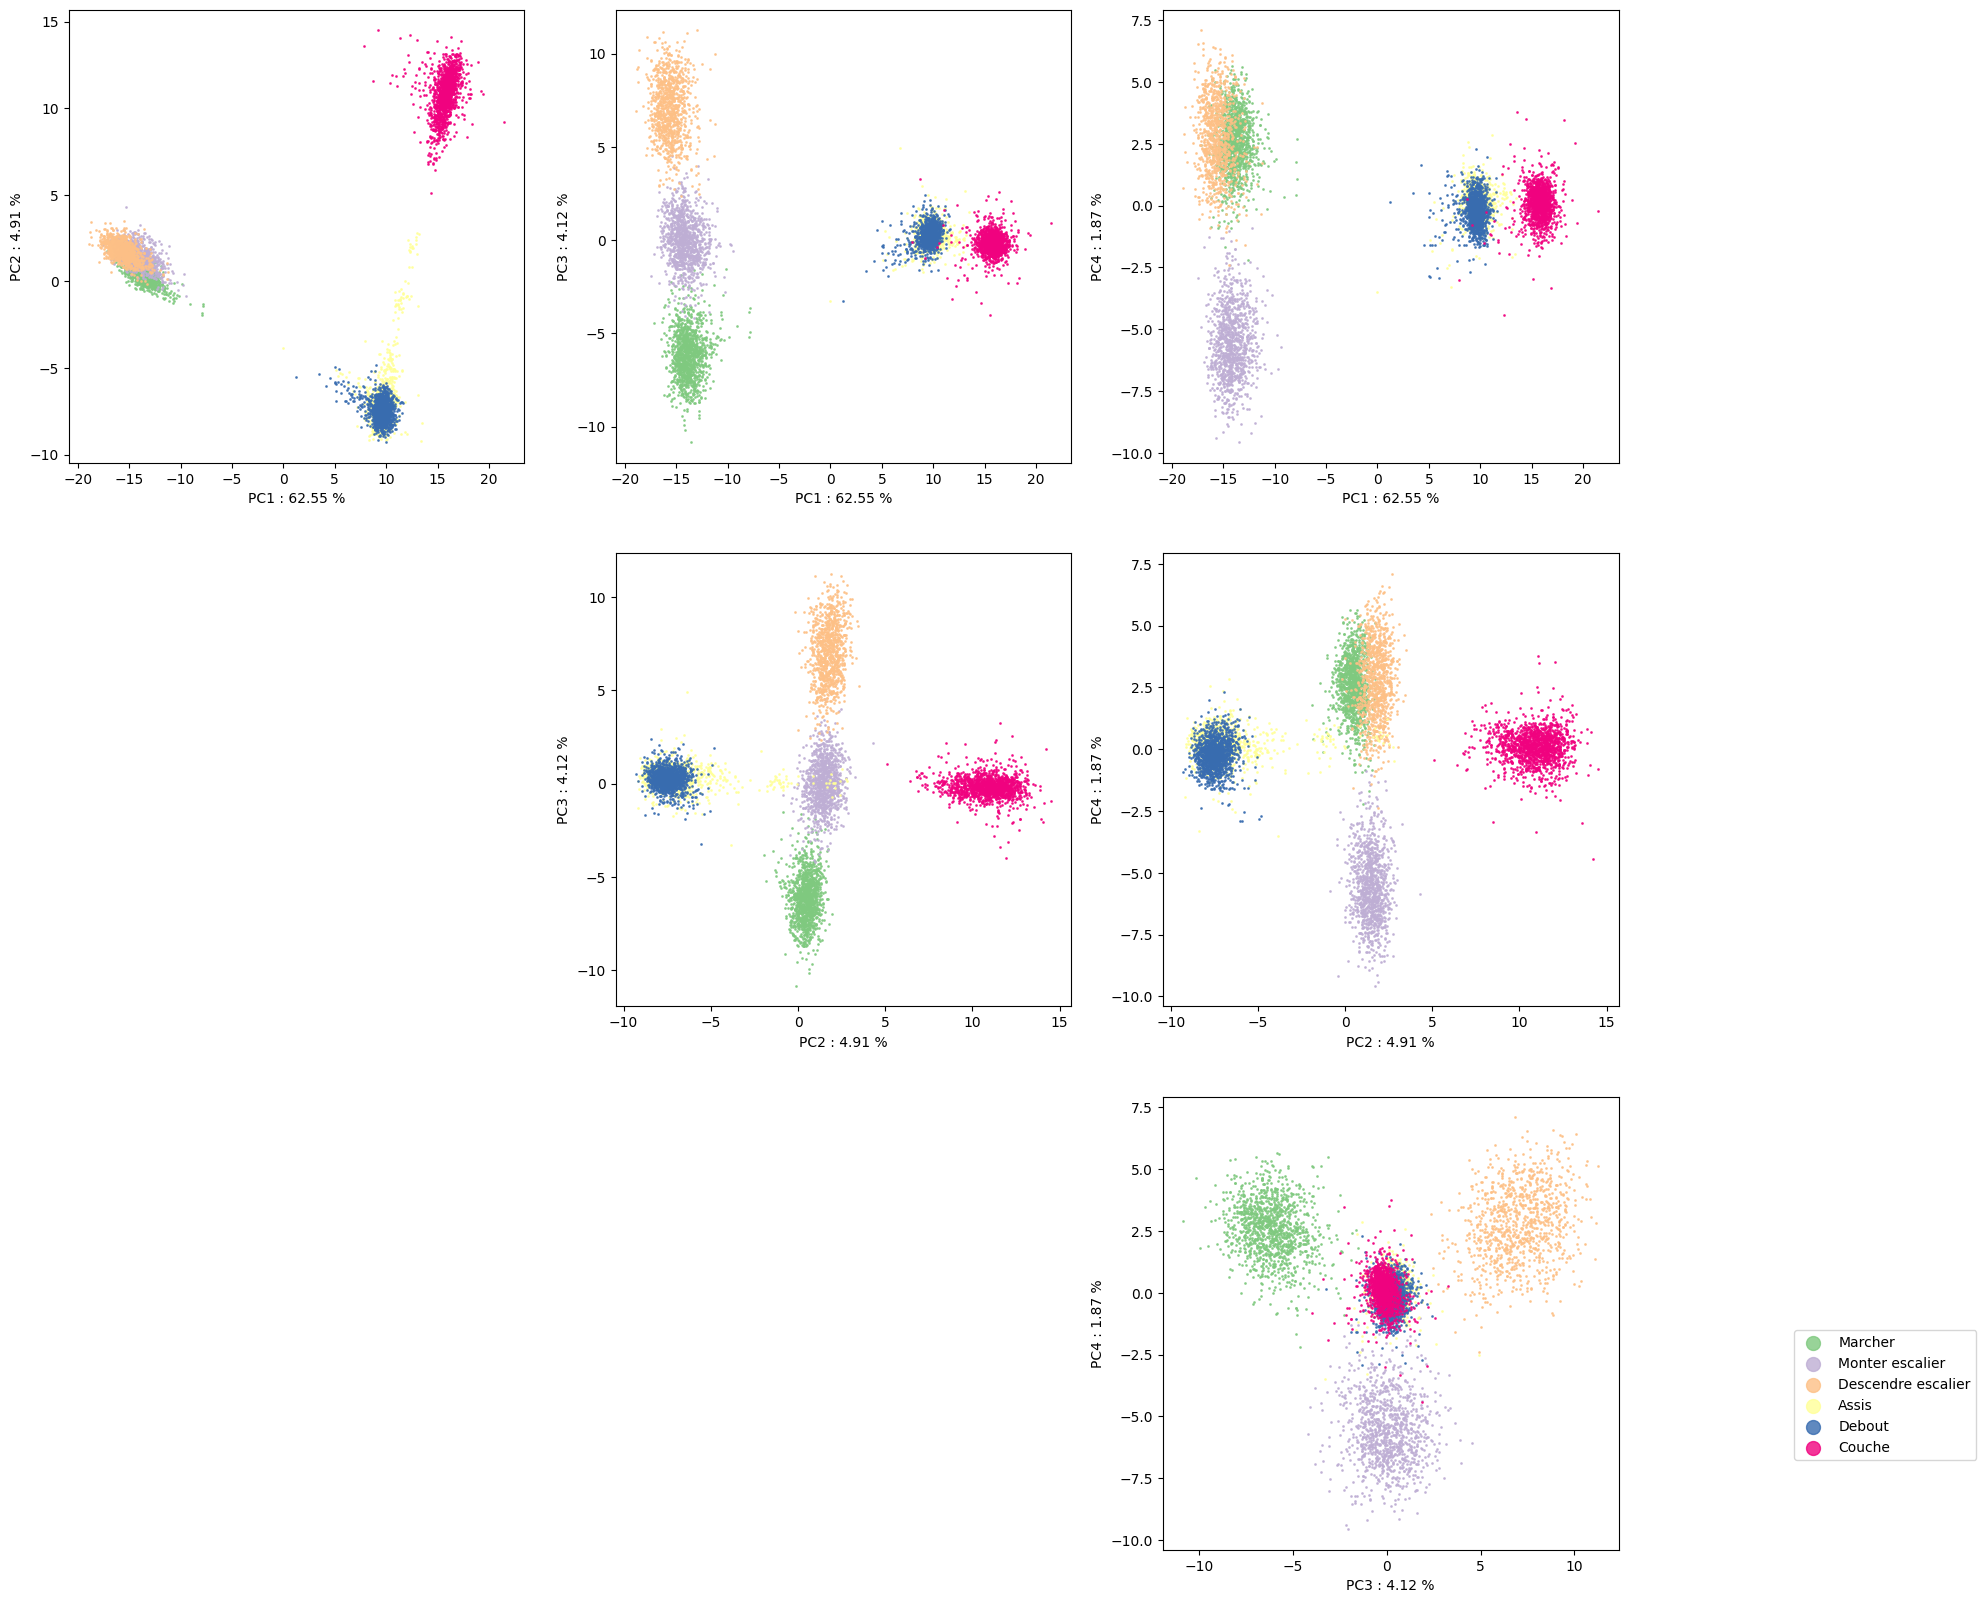

In [29]:
fig = plt.figure(figsize= (20, 20))
count = 0
for nbc, nbc2,count in [(1, 2, 1), (1, 3, 2), (1, 4, 3), (2, 3, 5), (2, 4, 6), (3, 4, 9)] :
    ax = fig.add_subplot(3, 3, count)
    plot_pca(X_r2, fig, ax, nbc, nbc2)
plt.legend(loc = 'upper right', bbox_to_anchor = (1.8, 0.5), markerscale = 10)
plt.show()

**Q** Que dire de la séparation des classes. Sont-elles toutes séparables deux à deux ?

    Les classes assises et debout ne sont pas séparées

**Q** Que dire de la forme des nuages notamment dans le premier plan ? Critiquer l'hypothèse utilisée dans l'AFD.

Comme pour l'ACP, la représentation des variables n'apporterait rien.

## 4 Apprentissage et prévision de l'activité par Analyse Factorielle Discriminante (AFD)

D'autres méthodes sont successivement testées dans les calepins complétant l'étude: SVM, $k$ plus proches voisins, forêts aléatoires, réseaux de neurones... Seule l'analyse discriminante décisionnelle et la régression logistique sont utilisées dans ce calepin pour illustrer la phase d'apprentissage / modélisation pour la prévision du comportement.

On rappelle que l'analyse factorielle discriminante a deux facettes : exploratoire et prédictive. L'analyse exploratoire réalise une ACP des centres des classes avec la métrique de Mahalanobis (qui a pour effet de rendre les données 'sphériques'), cf section 3. La prédiction est obtenue en utilisant le centre le plus proche au sens de cette métrique, en tenant compte des fréquences de chaque classe. De façon équivalente, c'est la prévision bayésienne obtenue lorsque le prior est un mélange gaussien homoscédastique.

### 4.1. Estimation du modèle

In [30]:
method = LinearDiscriminantAnalysis()
ts = time.time()
method.fit(Xtrain, ytrain)
scoreLDA = method.score(Xtest, ytest)
ypredLDA = method.predict(Xtest)
te = time.time()

### 4.2. Prévision de l'activité pour l'échantillon test

In [31]:
from sklearn.metrics import confusion_matrix
print("Score : %f, time running : %d secondes" %(scoreLDA, te - ts))
pd.DataFrame(confusion_matrix(ytest, ypredLDA), index = labels, columns=labels)

Score : 0.962335, time running : 0 secondes


,Marcher,Monter escalier,Descendre escalier,Assis,Debout,Couche
Marcher,490,6,0,0,0,0
Monter escalier,11,460,0,0,0,0
Descendre escalier,1,14,405,0,0,0
Assis,0,1,0,434,56,0
Debout,0,0,0,22,510,0
Couche,0,0,0,0,0,537


**Q** Quelles sont les classes qui restent difficiles à discriminer ?

**Q** Commenter la qualité des résultats obtenus. Sont-ils cohérents avec l'approche exploratoire ?


## 5 Apprentissage et prévision de l'activité par [Régression logistique](http://wikistat.fr/pdf/st-m-app-rlogit.pdf)


Une méthode ancienne mais finalement efficace sur ces données. La régression logistique est adaptée à la prévision d'une variable binaire. Dans le cas multiclasse, la fonction logistique de la librairie `Scikit-learn` estime *par défaut* **un modèle par classe**: une classe contre les autres. 

La probabilité d'appartenance d'un individu à une classe est modélisée à l'aide d'une combinaison linéaire des variables explicatives. Pour transformer une combinaison linéaire à valeur dans $R$ en une probabilité à valeurs dans l'intervalle $[0, 1]$, une fonction de forme sigmoïdale, inverse de la fonction *logit*, est appliquée.  Ceci donne: $P(y_i=1)=\frac{e^{Xb}}{1+e^{Xb}}$ ou encore, $\log\frac{P(y_i=1)}{1-P(y_i=1)}=Xb$


### 5.1  Estimation du modèle sans optimisation
Le modèle est estimé sans chercher à raffiner les valeurs de certains paramètres (pénalisation). Ce sera fait dans un deuxième temps.

In [32]:
from sklearn.linear_model import LogisticRegression
ts = time.time()
method = LogisticRegression()
method.fit(Xtrain, ytrain)
scoreLR = method.score(Xtest, ytest)
ypredLR = method.predict(Xtest)
te = time.time()

/home/felix/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 5.2. Prévision de l'activité pour l'échantillon test
Une fois le modèle estimé, l'erreur de prévision est évaluée, sans biais optimiste, sur un autre échantillon, dit échantillon test, qui n'a pas participé à l'apprentissage du modèle.

In [33]:
from sklearn.metrics import confusion_matrix
print("Score : %f, time running : %d secondes" %(scoreLR, te-ts))
pd.DataFrame(confusion_matrix(ytest, ypredLR), index = labels, columns=labels)

Score : 0.958263, time running : 0 secondes


,Marcher,Monter escalier,Descendre escalier,Assis,Debout,Couche
Marcher,492,1,3,0,0,0
Monter escalier,24,445,2,0,0,0
Descendre escalier,4,13,403,0,0,0
Assis,0,3,0,431,57,0
Debout,0,0,0,16,516,0
Couche,0,0,0,0,0,537


**Q** Mêmes questions que pour le modèle précédent (AFD) : Quelles sont les classes qui restent difficiles à discriminer ? Commenter la qualité des résultats obtenus. Sont-ils cohérents avec l'approche exploratoire ?

**Q** Comparer avec l'AFD. Qu'est-ce qui peut expliquer que, souvent, les résultats de l'AFD et de la régression logistique sont semblables ? Pourquoi les deux méthodes sont-elles complémentaires ?

Un calepin suivant exploite d'autres méthodes d'apprentissage ainsi qu'une stratégie de hiérarchisation des modèles afin d'améliorer encore la prévision sur les données métiers. 

Un autre traite directement les signaux bruts en apprennant un réseau de neurones profond associant des couches convolutionnelles afin d'obtenir des résultats comparables sans prétraitement des données. Réseau intégrable à un équipement embarqué de faible consommation.